In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline 

In [2]:
# Reading the data
df = pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data cleaning

In [3]:
# finding any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**No null values found**

In [4]:
#changing the type of TotalCharges from string to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [5]:
#Checking again for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Removing the null values from the TotalCharges column
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
# overview on the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.shape

(7032, 21)

In [10]:
df.duplicated().sum()

0

## Data analysis process

In [11]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [12]:
df.groupby(['gender', 'Churn']).size()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
dtype: int64

**Relation between contract and churn**

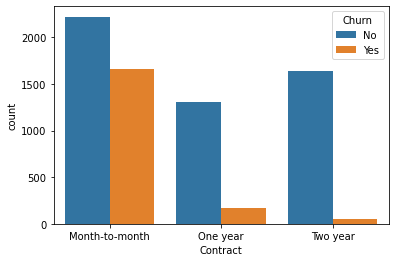

In [9]:
sb.countplot(data = df, x = 'Contract', hue = 'Churn');

In [10]:
df.groupby(['InternetService', 'Churn']).size()

InternetService  Churn
DSL              No       1957
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1407
                 Yes       113
dtype: int64

**Relation between Internet service types and churn**

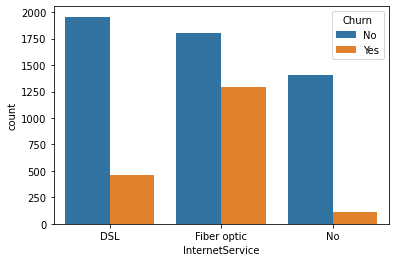

In [27]:
sb.countplot(data = df, x = 'InternetService', hue = 'Churn');

In [26]:
df.groupby('InternetService').MonthlyCharges.mean()

InternetService
DSL            58.088017
Fiber optic    91.500129
No             21.076283
Name: MonthlyCharges, dtype: float64

In [16]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [17]:
df.groupby('PaymentMethod').MonthlyCharges.mean()

PaymentMethod
Bank transfer (automatic)    67.205577
Credit card (automatic)      66.519264
Electronic check             76.255814
Mailed check                 43.958354
Name: MonthlyCharges, dtype: float64

In [18]:
df.groupby(['Dependents', 'Churn']).size()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1773
            Yes       326
dtype: int64

**Relation between dependents count and churn**

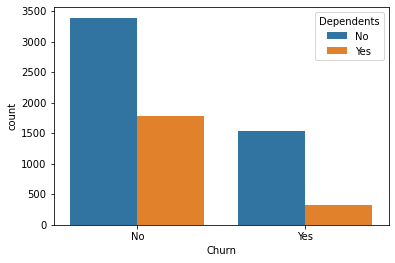

In [29]:
sb.countplot(data = df, x = 'Churn', hue = 'Dependents');

**relation between partner exsistence and churn**

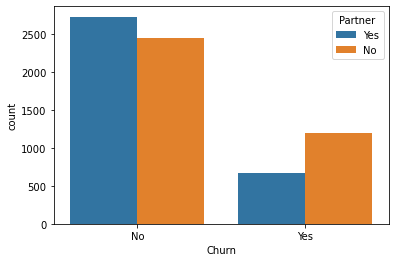

In [28]:
sb.countplot(data = df, x = 'Churn', hue = 'Partner');

**Relation between Tech support service and churn**

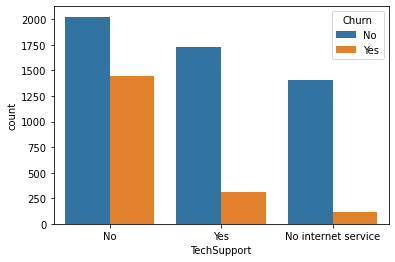

In [14]:
df.groupby(['TechSupport', 'Churn']).size()
sb.countplot(data = df, x = 'TechSupport', hue = 'Churn');

## data analysis conculsion

1- the type of contract greatly affect the churn rate, the month to month contract has the highest churn rate compared to yearly contract or 2 years contract, this can be explained that as long as the duration of the contract increases, the churn rate decreased greatly.

2-the fiber optics service has the highest churn rate though the number of client havig this service is the highest, this may indicate that there is a problem with this service.

3- 

## Logistic regression

In [15]:
import statsmodels.api as sm

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
# Converting the Churn column into bina
df[['no churn','churn']] = pd.get_dummies(df['Churn'])
df.drop('no churn',axis=1,inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


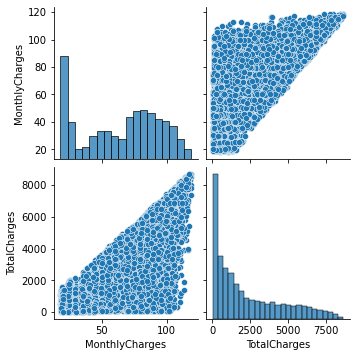

In [19]:
#Finding correlation between monthly charges and total charges
sb.pairplot(df[['MonthlyCharges','TotalCharges']]);

In [20]:
df['MonthlyCharges'].corr(df['TotalCharges'])

0.6510648032262024

In [21]:
#logistic regression with the quantitative variables
df['intercept'] = 1
log_mod = sm.Logit(df['churn'],df[['intercept','MonthlyCharges','TotalCharges','tenure']])
results=log_mod.fit()
results.summary2()

C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:                Logit            Pseudo R-squared: inf   
Dependent Variable:   churn            AIC:              inf   
Date:                 2021-08-10 21:13 BIC:              inf   
No. Observations:     7032             Log-Likelihood:   -inf  
Df Model:             3                LL-Null:          0.0000
Df Residuals:         7028             LLR p-value:      1.0000
Converged:            1.0000           Scale:            1.0000
No. Iterations:       7.0000                                   
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
intercept      -1.5988   0.1173 -13.6278 0.0000 -1.8288 -1.3689
MonthlyCharges  0.0302   0.0017  17.5847 0.0000  0.0268  0.0336
TotalCharges    0.0001   0.0001   2.3613 0.0182  0.0000  0.0003
tenure         -0.0671   0.0055 -12.2970 0.0000 -0.0778 -0.0564
===============================================================

"""

In [28]:
# exponentiate all the cofficients
np.exp(0.0302) , np.exp(0.0001) , np.exp(-0.0671)

(1.0306606454707723, 1.0001000050001667, 0.9351016864924631)

In [29]:
1/np.exp(-0.0671)

1.0694024130690731

In [42]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [22]:
# Converting all the categorial variales into dummy variables

df[['no partner','partner']] = pd.get_dummies(df['Partner'])
df.drop('no partner',axis=1,inplace=True)

df[['no dependents','dependents']] = pd.get_dummies(df['Dependents'])
df.drop('no dependents',axis=1,inplace=True)

df[['Month-to-month', 'One year', 'Two year']] = pd.get_dummies(df['Contract'])
df.drop('Two year',axis=1,inplace=True)

df[['DSL', 'Fiber optic', 'No']] = pd.get_dummies(df['InternetService'])
df.drop('No',axis=1,inplace=True)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,churn,intercept,partner,dependents,Month-to-month,One year,DSL,Fiber optic
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,No,0,1,1,0,1,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1889.50,No,0,1,0,0,0,1,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,108.15,Yes,1,1,0,0,1,0,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1840.75,No,0,1,0,0,0,1,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,151.65,Yes,1,1,0,0,1,0,0,1


In [23]:
# Applying logistic regression for the categorial variables

log_mod = sm.Logit(df['churn'],df[['intercept','partner','dependents','Month-to-month', 'One year','DSL', 'Fiber optic']])
results=log_mod.fit()
results.summary2()

C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Workstation\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:                Logit            Pseudo R-squared: inf   
Dependent Variable:   churn            AIC:              inf   
Date:                 2021-08-10 21:14 BIC:              inf   
No. Observations:     7032             Log-Likelihood:   -inf  
Df Model:             6                LL-Null:          0.0000
Df Residuals:         7025             LLR p-value:      1.0000
Converged:            1.0000           Scale:            1.0000
No. Iterations:       8.0000                                   
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
intercept      -4.2492   0.1779 -23.8789 0.0000 -4.5979 -3.9004
partner        -0.2512   0.0705  -3.5627 0.0004 -0.3894 -0.1130
dependents     -0.2271   0.0838  -2.7115 0.0067 -0.3913 -0.0629
Month-to-month  2.8188   0.1530  18.4233 0.0000  2.5189  3.1186
One year        1.2593   0.1702   7.3979 0.0000  0.9257  1.5929
DSL             0.8227   0.1165   7.0636 0.0000  0.5944  1.0510
Fiber optic     1.7635   0.1109  15.8982 0.0000  1.5461  1.9809
===============================================================

"""

In [24]:
# Exponentiate all the coefficient
np.exp(-0.2512) , np.exp(-0.2271), np.exp(2.8188) , np.exp(1.2593),  np.exp(0.8227) , np.exp(1.7635)

(0.7778667826440556,
 0.7968410941963817,
 16.756730525835504,
 3.5229545558509896,
 2.2766384705190563,
 5.832816568033116)

In [25]:
# Get the reciprocal of exponentaited variables less than 1
1/np.exp(-0.2512) , 1/np.exp(-0.2271)

(1.2855671720559771, 1.2549553572014318)

# Conclusion

**the month to month contract type has the highest effect on the churn rate, also the fiber optics internet service has a high effect on the churn rate**